In [1]:
import numpy as np

In [2]:
np.random.seed(100)

In [3]:
duration = 2
sampling_rate = 30000
n_samples = duration * sampling_rate

In [4]:
def signal_func(t: np.array, num: int = 13) -> np.array:
    freqs: np.array = np.random.normal(4000, 1000, num)
    ampls: np.array = np.random.normal(5.0, 2.5, num)
    phases: np.array = np.random.uniform(0, 2*np.pi, num)

    signal = np.zeros_like(t)

    for ampl, freq, phase in zip(ampls, freqs, phases):
        signal += ampl * np.sin(2 * np.pi * freq * t + phase)

    additional_freqs: np.array = np.concatenate((np.random.uniform(10, 3000, 50),
                                                np.random.uniform(5000, 15000, 50)))
    additional_ampls: np.array = np.random.uniform(0.01, 0.5, 100)

    for freq, ampl in zip(additional_freqs, additional_ampls):
        signal += ampl * np.sin(2 * np.pi * freq * t)

    noise = np.random.normal(0, np.random.uniform(0.1, 0.4), len(t))
    signal += noise

    return signal

In [5]:
t = np.linspace(0, duration, n_samples)

In [6]:
signal = signal_func(t)

In [7]:
def rmse(y_true: np.array, y_pred: np.array) -> float:
    return np.sqrt(np.square(np.subtract(y_true, y_pred)).mean())

In [8]:
import matplotlib.pyplot as plt

In [9]:
from hmmlearn import hmm

In [10]:
MAX_STATES = 10

In [11]:
def best_hmm_models(signal: np.array):
    aic_values = []
    bic_values = []
    models = []

    for n_components in range(1, MAX_STATES + 1):
        model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=100, random_state=42)
        model.fit(signal.reshape(-1, 1))
        log_likelihood = model.score(signal.reshape(-1, 1))

        # Вычисление AIC и BIC
        num_params = n_components ** 2 + 2 * n_components - 1  # число параметров модели
        aic = 2 * num_params - 2 * log_likelihood
        bic = num_params * np.log(n_samples) - 2 * log_likelihood

        aic_values.append(aic)
        bic_values.append(bic)
        models.append(model)

    return models[np.argmin(aic_values)], models[np.argmin(bic_values)]

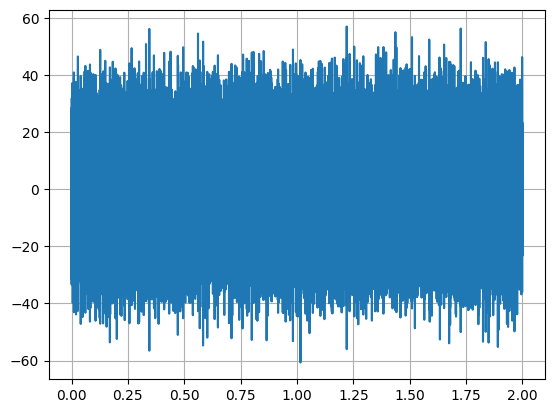

In [12]:
plt.plot(t, signal)
plt.grid(True)
plt.show()

In [13]:
best_aic_model, best_bic_model = best_hmm_models(signal)
aic_signal = best_aic_model.predict(signal.reshape(-1, 1))
bic_signal = best_bic_model.predict(signal.reshape(-1, 1))

In [17]:
rmse(signal, aic_signal), rmse(signal, bic_signal)

(16.453042394483596, 16.453042394483596)

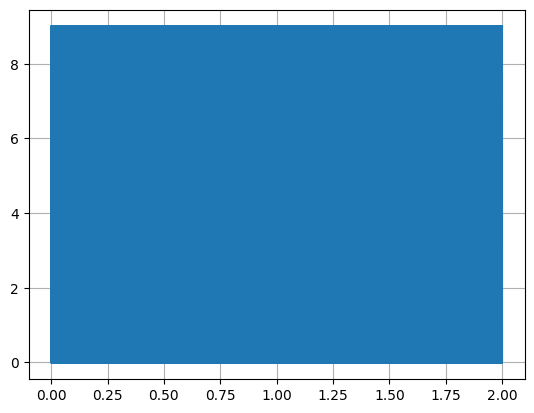

In [15]:
plt.plot(t, aic_signal)
plt.grid(True)
plt.show()

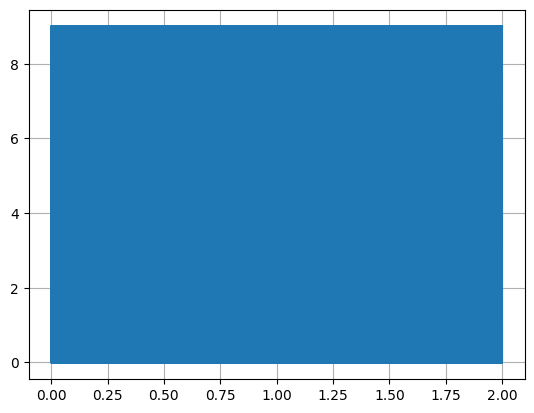

In [16]:
plt.plot(t, bic_signal)
plt.grid(True)
plt.show()